In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from scipy import stats
import plotly.express as px
import os

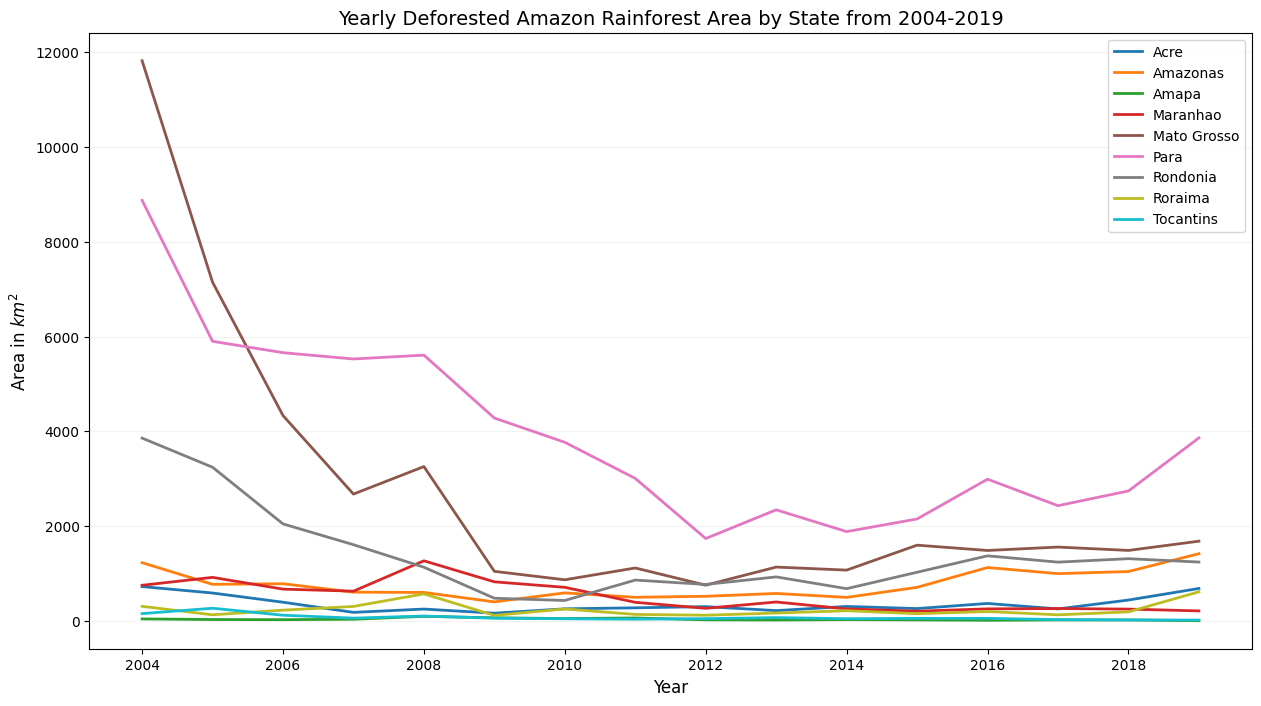

In [2]:
fig, ax = plt.subplots(figsize=(15,8))
deforest_df = pd.read_csv('def_area_2004_2019.csv')
deforest_df.drop(['AMZ LEGAL'], axis=1, inplace=True)
states = ['Acre', 'Amazonas', 'Amapa', 'Maranhao', 'Mato Grosso', 'Para', 'Rondonia', 'Roraima', 'Tocantins']
deforest_df.plot(x='Ano/Estados', y=deforest_df.columns[1:10], 
                 label=states , colormap='tab10', linewidth=2, ax=ax)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Area in $km^2$', fontsize=12)
ax.set_title('Yearly Deforested Amazon Rainforest Area by State from 2004-2019', fontsize=14)
ax.grid(axis='y', color='0.95')

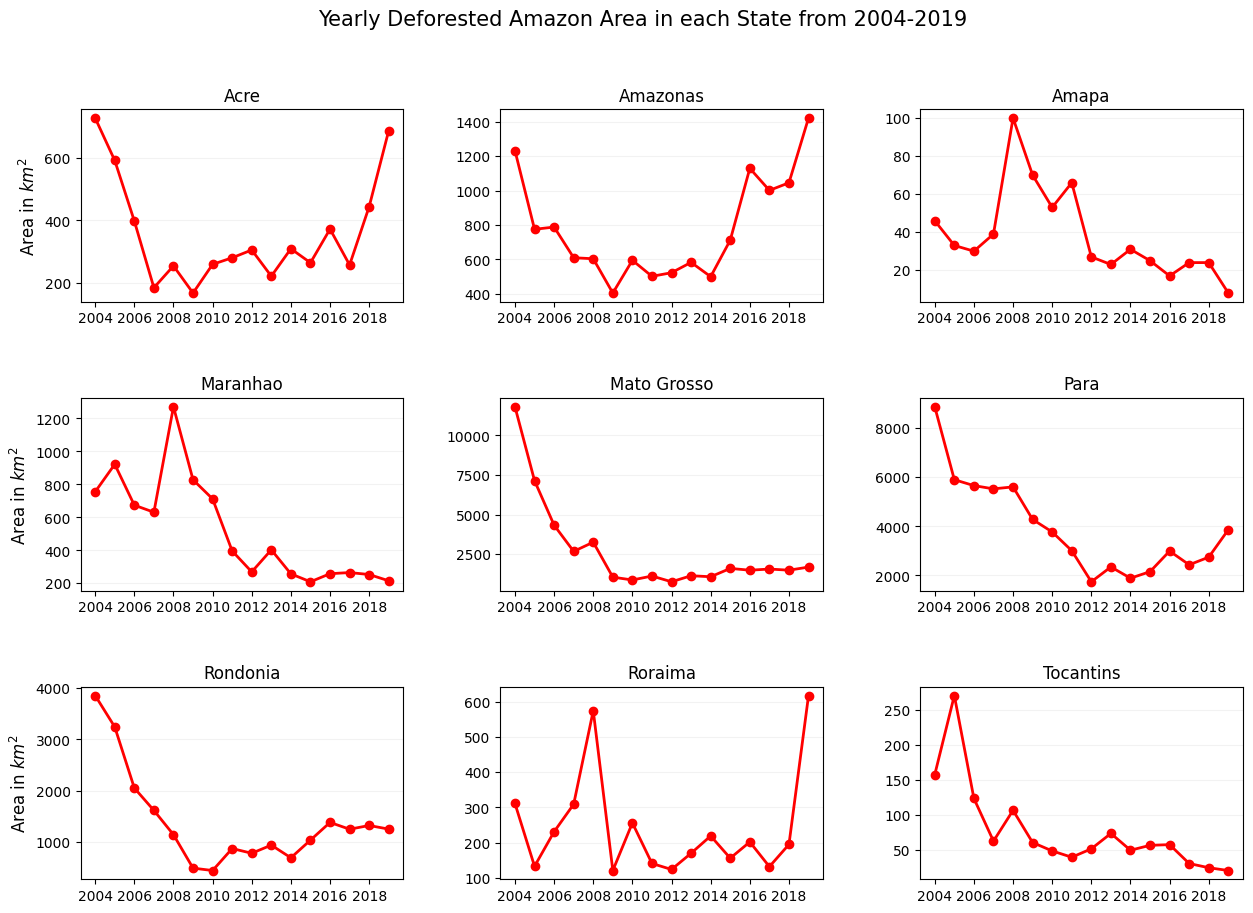

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.suptitle('Yearly Deforested Amazon Area in each State from 2004-2019', fontsize=15)
col_names = deforest_df.columns[1:10]
for i in range(3):
    for j in range(3):
        col = col_names[i*3+j]
        ax[i,j].plot(deforest_df['Ano/Estados'], deforest_df[col], linewidth=2, color='red', marker='o')
        ax[i,j].set_ylabel('Area in $km^2$', fontsize=12)
        ax[i,j].set_title(states[i*3+j])
        ax[i,j].grid(axis='y', color='0.95')
        ax[i,j].xaxis.set_major_locator(MaxNLocator(integer=True))
        if (j>0):
             ax[i,j].set(ylabel='')

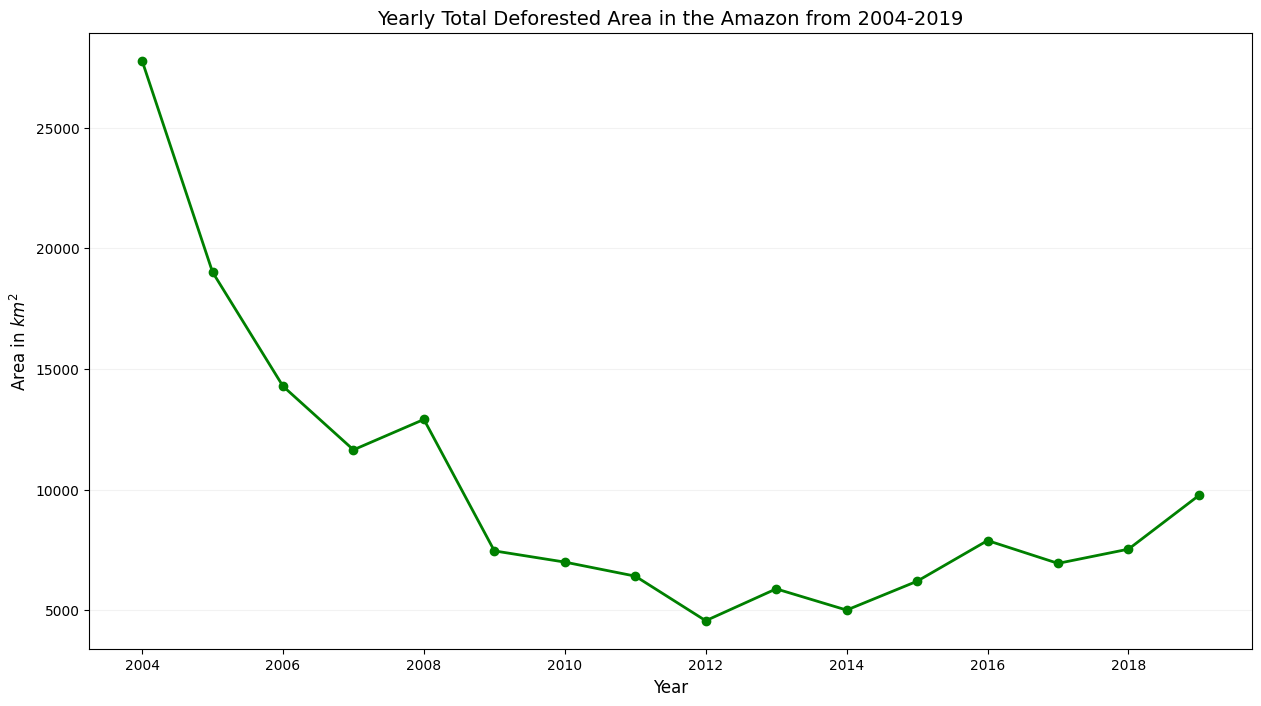

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
deforest_df['total_area'] = deforest_df['AC'] + deforest_df['AM'] + deforest_df['AP'] + deforest_df['MA'] + deforest_df['MT'] + deforest_df['PA'] + deforest_df['RO'] + deforest_df['RR']+ deforest_df['TO']
deforest_df.plot(x='Ano/Estados', y='total_area',linewidth=2, 
                 legend=False, color='Green',marker='o', ax=ax)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Area in $km^2$', fontsize=12)
ax.set_title('Yearly Total Deforested Area in the Amazon from 2004-2019', fontsize=14)
ax.grid(axis='y', color='0.95')

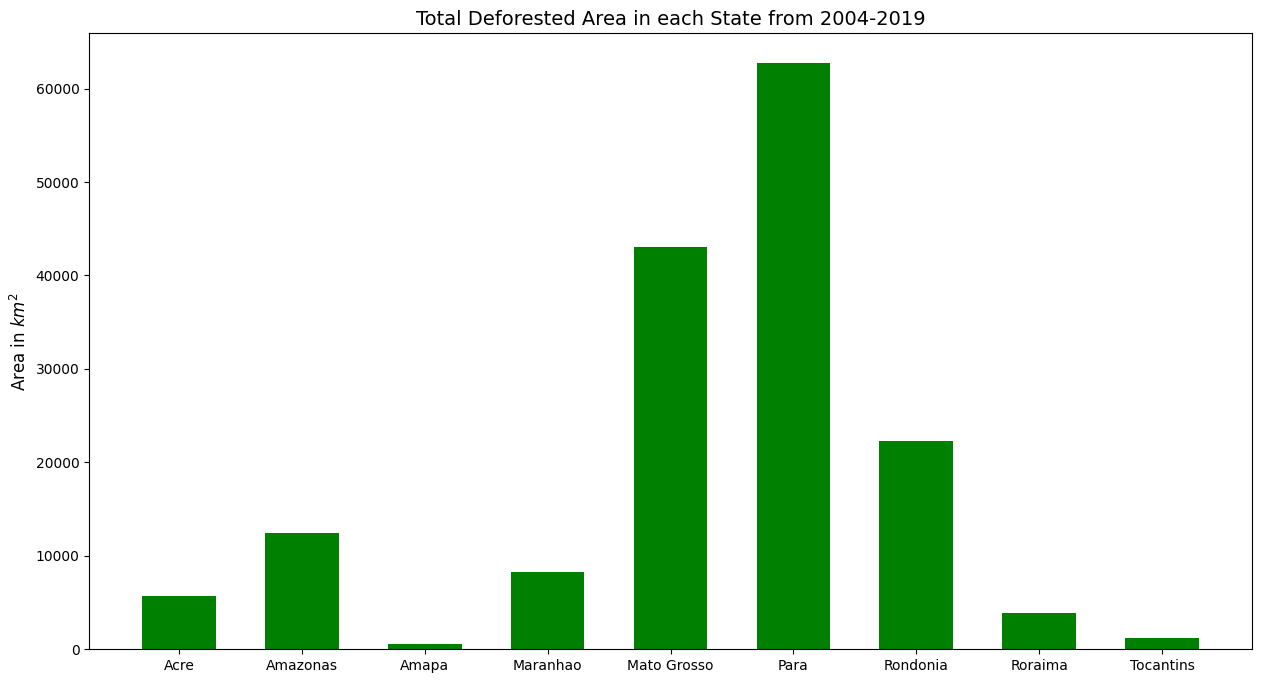

In [14]:
fig, ax = plt.subplots(figsize=(15,8))

# Using pd.concat instead of .append
states_def_df = pd.concat([deforest_df, deforest_df.sum(numeric_only=True).to_frame().T], ignore_index=True)

states_def_df.drop(['Ano/Estados', 'total_area'], axis=1, inplace=True)
bar_def = states_def_df.iloc[[-1]].squeeze().tolist()

ax.bar(states, bar_def, width=0.6, color='green')
ax.set_ylabel('Area in $km^2$', fontsize=12)
ax.set_title('Total Deforested Area in each State from 2004-2019', fontsize=14)
plt.show()


### Impact of el nino and la nina on deforested area and their correlation

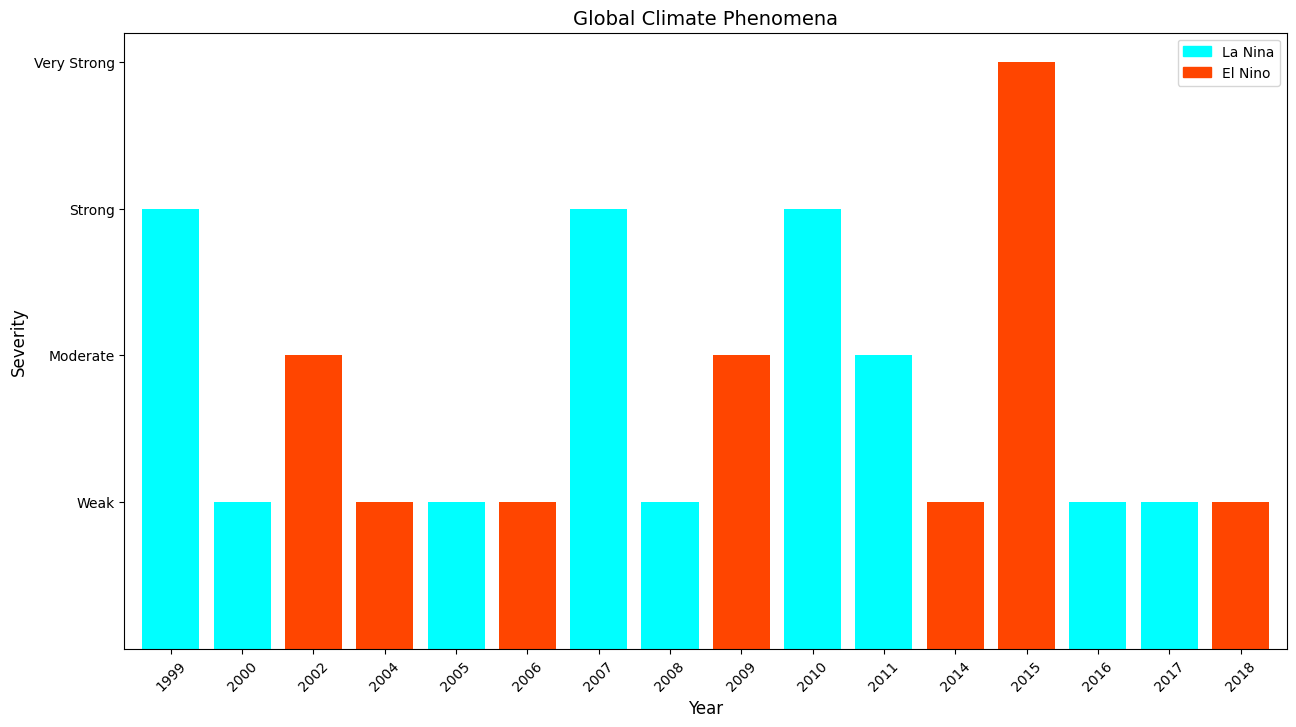

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
climate_df = pd.read_csv('el_nino_la_nina_1999_2019.csv')
height_map = {'Weak': 1, 'Moderate': 2, 'Strong': 3, 'Very Strong': 4}
climate_df['severity_height'] = climate_df['severity'].map(height_map)
climate_df.sort_values(by='start year', inplace=True)
colors = {'La Nina': 'cyan', 'El Nino': 'orangered'}
climate_df.plot.bar(x='start year', y='severity_height', 
                    yticks=range(1,5,1), width = 0.8,  
                    color=climate_df['phenomenon'].replace(colors), rot=45, ax=ax)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Severity', fontsize=12)
ax.set_title('Global Climate Phenomena', fontsize=14)
ax.set_yticklabels(height_map.keys())
labels = ['La Nina', 'El Nino']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels)
plt.show()

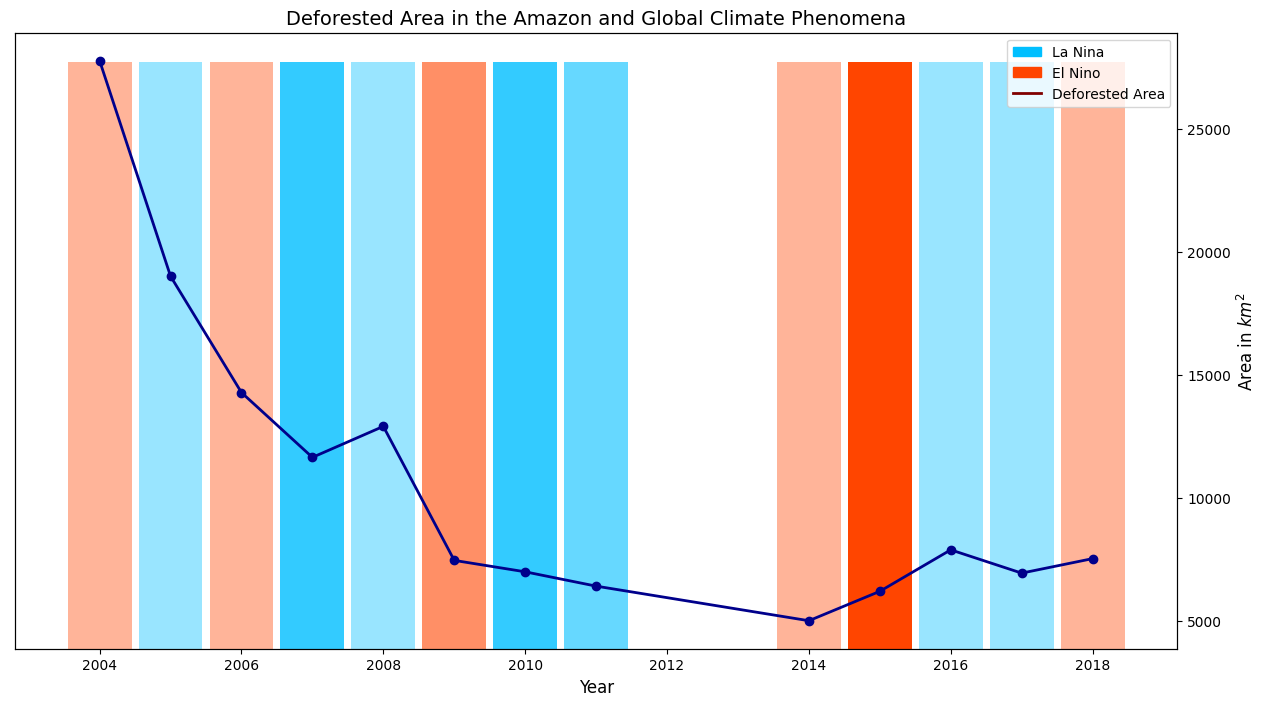

In [24]:
# Define the colors and labels
colors = {'El Nino': 'orangered', 'La Nina': 'deepskyblue'}
labels = ['La Nina', 'El Nino']

# Merge the dataframes
deforest_climate_df = pd.merge(left=climate_df, right=deforest_df, left_on='start year', right_on='Ano/Estados')

# Define alpha values for the severity levels
alpha_map = {'Weak': 0.4, 'Moderate': 0.6, 'Strong': 0.8, 'Very Strong': 1}
deforest_climate_df['severity_alpha'] = deforest_climate_df['severity'].map(alpha_map)

# Plot El Nino and La Nina bars
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=deforest_climate_df['start year'], height=1, width=0.9, color=deforest_climate_df['phenomenon'].replace(colors))

# Set alpha transparency based on severity
for bar, alpha in zip(ax.containers[0], deforest_climate_df['severity_alpha']):
    bar.set_alpha(alpha)

# Hide the y-axis for the bar plot
ax.get_yaxis().set_ticks([])

# Plot deforestation line on the twin y-axis
ax2 = ax.twinx()
deforest_climate_df.plot(x='Ano/Estados', y='total_area', 
                         linewidth=2, 
                         legend=False, color='darkblue', marker='o', ax=ax2)

# Set labels
ax.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Area in $km^2$', fontsize=12)
ax.set_title('Deforested Area in the Amazon and Global Climate Phenomena', fontsize=14)

# Create a legend
legend_labels = ['La Nina', 'El Nino', 'Deforested Area']
handles = [plt.Rectangle((0,0),1,1,color=colors[label]) for label in labels]
line = plt.Line2D([0], [0], color='maroon', linewidth=2, label='Deforested Area')
handles.append(line)
ax.legend(handles, legend_labels)

plt.show()
